# Exploração a análise de dados de crédito usando SQL

---

##### Neste notebook iremos realizar a exploração e a análise dos dados de um banco de dados que contém informações sobre crédito de clientes de uma instituição.

##### Iremos gerar alguns insights destes dados fazendo uso da linguagem de programação SQL através da aplicação Athena e criação de diretório de dados na aplicação S3. Ambas oferecidas pela plataforma da AWS.

----

## Carregando os dados

##### Antes de mais nada, iremos realizar o upload dos dados na aplicação S3 da plataforma AWS.

##### Criaremos um bucket chamado "bucket-transacoes-lucas-souza" que irá armazenar nossa base de dados de crédito chamada "SQL_analise_credito.csv"

##### Em seguida nós vamos configurar nosso Athena para que os resultados de nossas querys estejam todos guardados em um bucket separado chamado bucket-lucas-souza-results

##### Com nosso dataset upado na aplicação S3 e um bucket criado para armazenar os resultados das nossas consultas, podemos agora criar uma tabela na aplicação Athena para que possamos trabalhar com estes dados.

####  QUERY:

CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (

    `idade` int,
    
    `sexo` string,
    
    `dependentes` int,
    
    `escolaridade` string,
    
    `estado_civil` string,
    
    `salario_anual` string,
    
    `tipo_cartao` string,
    
    `qtd_produtos` bigint,
    
    `iteracoes_12m` int,
    
    `meses_inativo_12m` int,
    
    `limite_credito` float,
    
    `valor_transacoes_12m` float,
    
    `qtd_transacoes_12m` int
    
)

ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'

WITH SERDEPROPERTIES (

    'serialization.format' = ',',
    
    'field.delim' = ','
    
)

LOCATION 's3://bucket-transacoes-lucas-souza/'

TBLPROPERTIES ('has_encrypted_data' = 'false');

---

## Conhecendo os dados

##### Os dados representam informações de clientes de um banco e contam com as sseguintes colunas:

- idade = idade do cliente
- sexo = sexo do cliente (F ou M)
- dependentes = número de dependentes do cliente
- escolaridade = nível de escolaridade dos clientes
- salario_anual = faixa salarial do cliente
- tipo_cartão = tipo de cartao do cliente
- qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
- iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
- meses_inativo = quantidade de meses que o cliente ficou inativo
- limite_credito = limite de credito do cliente
- valor_transacoes_12m = valor das transações dos ultimos 12 meses
- qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

#### OBS:

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset.

---

## Exploração dos dados

##### Vamos agora iniciar a exploração de dados para que possamos entender um pouco mais nossa base.

 #### Quantas observações existem na base?

 Query: SELECT count(*) FROM credito
  
Resposta 2564 linhas:

##### Esta base de dados é uma parte da base de dados original que podemos encontrar no link já fornecido acima. Na prática, quanto maior o número de dados mais confiável será a análise. Para este caso estamos usando somente uma parte desta base para que possamos praticar nossos conhecimentos de análise exploratória e também economizar recusros do AWS que cobra a cada consulta que é feita na plataforma.

##### Veja como é a nossa tabela:

#### QUERY: 

SELECT * FROM "default"."credito" limit 10;

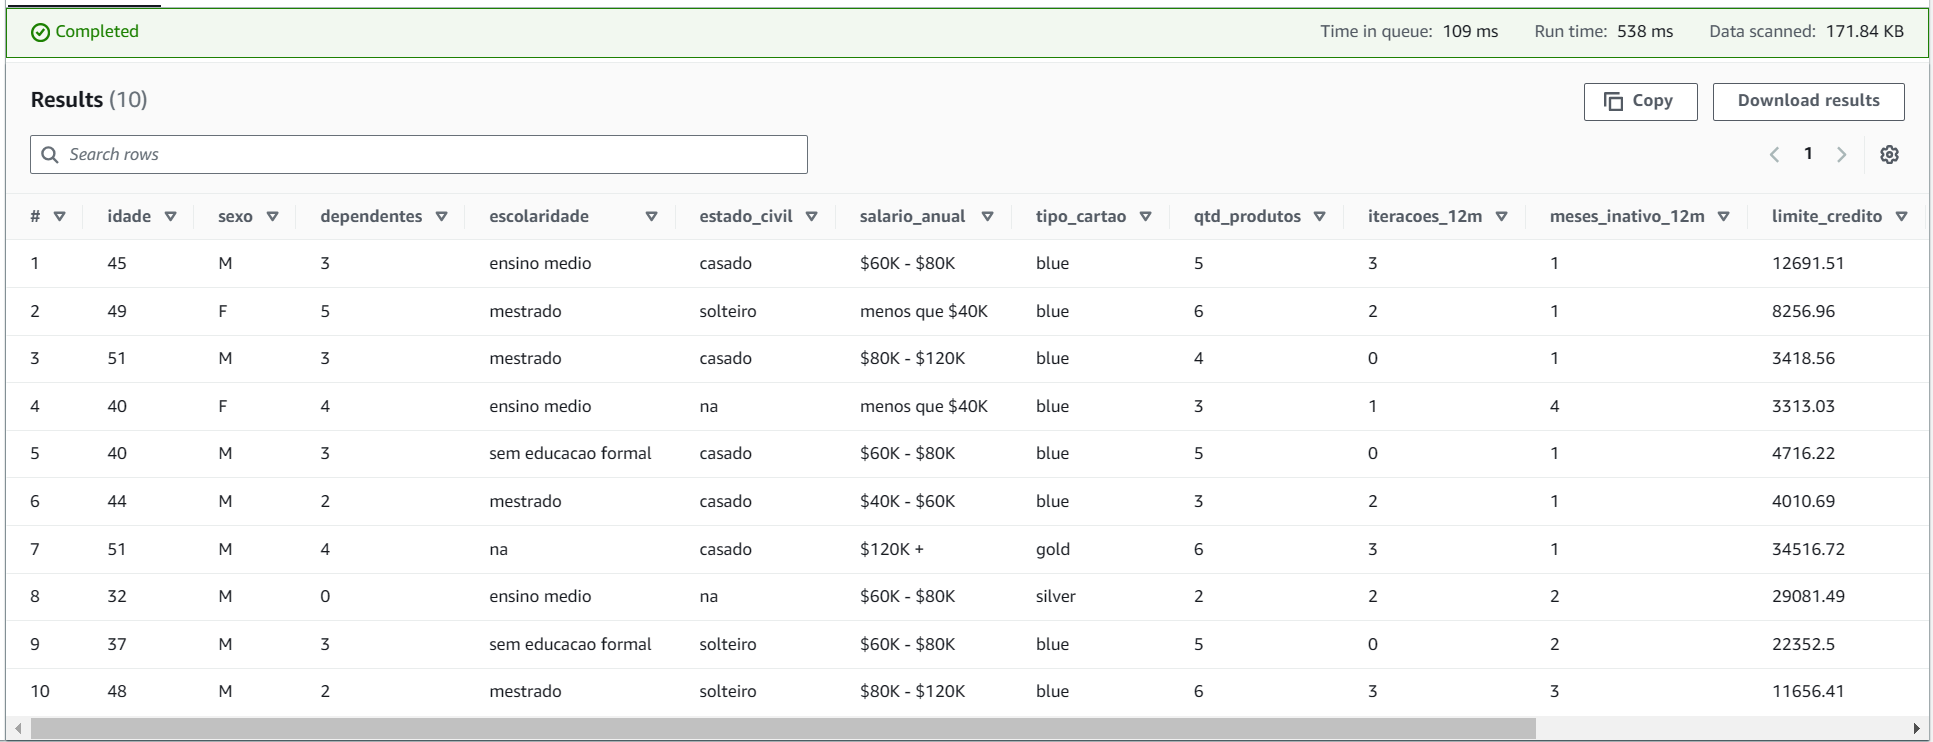

##### De cara, podemos observar que existem alguns dados nulos (com valor = 'na'). Numa analise mais aprofundada estes dados teriam que ser tratados de alguma forma para que nossas visões dos dados não se distorçam por conta de ausencia de dados que poderiam ser importantes.

### Quais os tipos de cada dado?

#### QUERY:

DESCRIBE credito

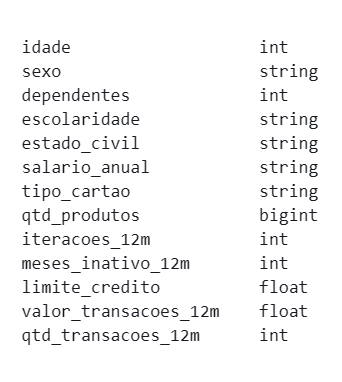
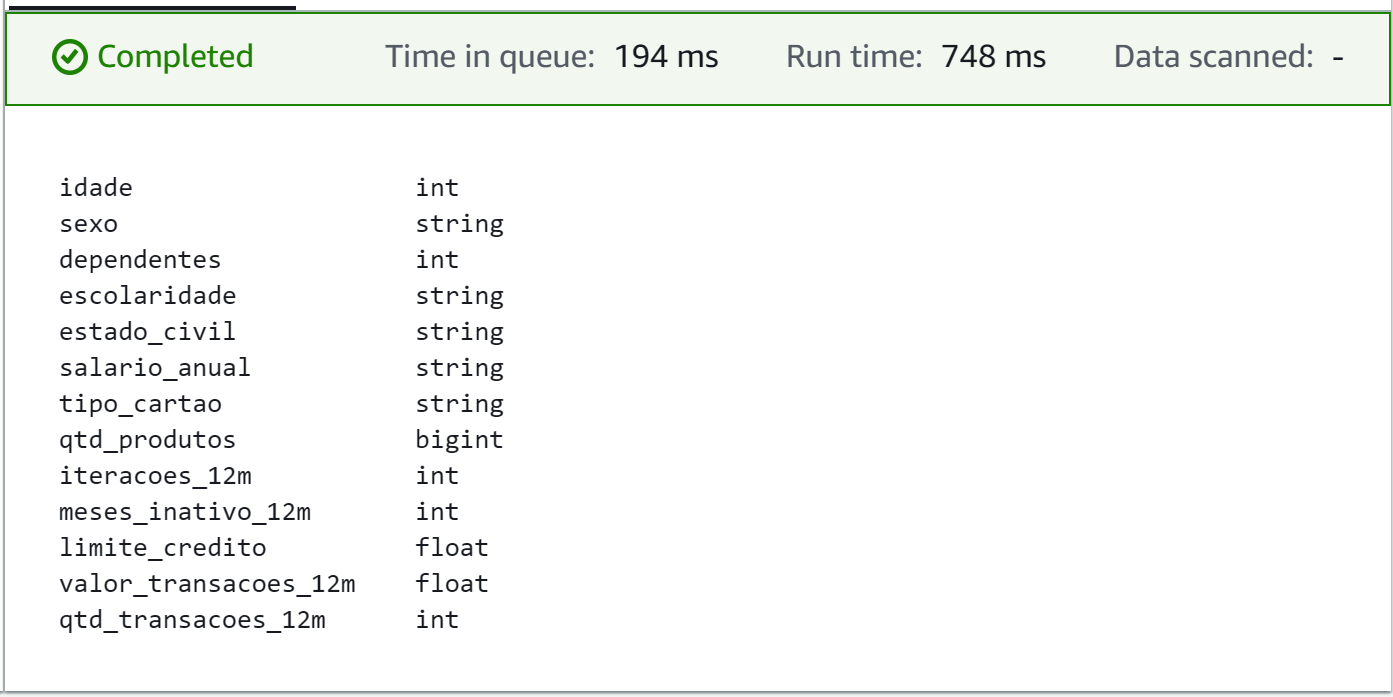

#### Aqui vemos que temos diferentes naturezas de dados que nos informam que temos dados numéricos e categóricos em nossa base.

#### Quais as escolaridades temos em nossa base?

#### QUERY:

SELECT DISTINCT escolaridade FROM credito

WHERE escolaridade != 'na'

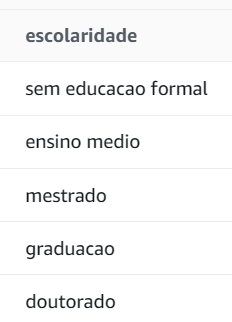

#### Contamos com cinco tipos diferentes de escolaridade. Mais a frente poderemos explorar estas categorias mais a fundo para vermos se conseguimos alguma informação relevante

#### Quais sã os tipos de estado civil disponíveis na base?

#### QUERY:

SELECT DISTINCT estado_civil FROM credito

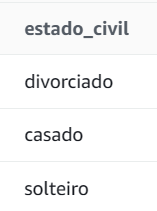

##### Estado civil temos três opções diferentes.

#### Quais são as faixas salariais disponíveis na base?

#### QUERY:

SELECT DISTINCT salario_anual FROM credito

WHERE salario_anual != 'na'

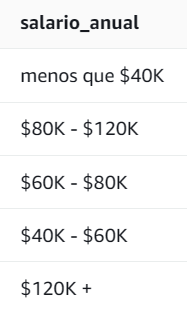

#### Os salários estão divididos por faixas que vão de menos de 40 mil por ano até mais de 120 mil por ano. Podem ser categorias interessantes para medir características financeiras com relação à outras variáveis da base.

#### Quais são os tipos de cartão disponiveis?

#### QUERY:

SELECT DISTINCT tipo_cartao FROM credito

WHERE tipo_cartao != 'na'

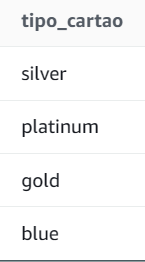

#### Quatro tipos de cartão. Provavelmente cada cartão se encaixará em sua respectiva faixa de salário anual.

---

## Análise dos dados

#### Agora que compreendemos um pouco sobre os dados da nossa base, vamos analisá-los.

#### Para isso podemos levantar questões para respondê-las através dos dados usando o consultas em SQL

### Quantos clientes temos de cada faixa salarial?

### QUERY:

SELECT salario_anual, COUNT(*) AS contagem

FROM credito 

WHERE salario_anual != 'na'

GROUP BY salario_anual 

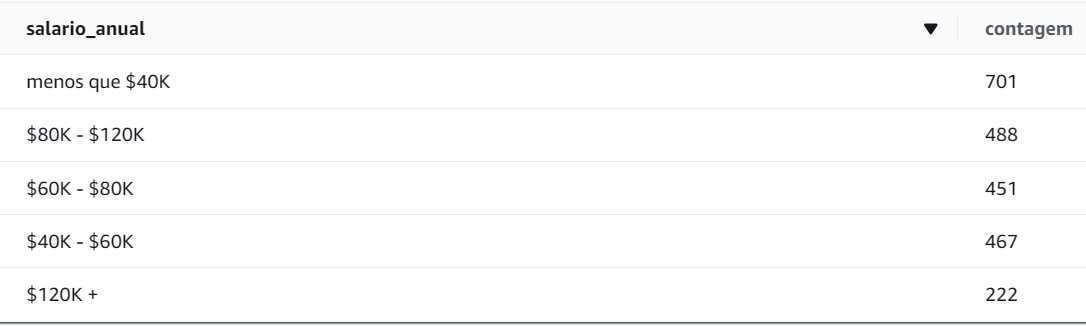

#### Vemos que a maioria dos clientes da base têm uma renda igual ou menor a 40k anuais.

### Quantos clientes são homens e quantos são mulheres?

### QUERY:

SELECT sexo, COUNT (*) AS contagem

FROM credito

GROUP BY sexo;

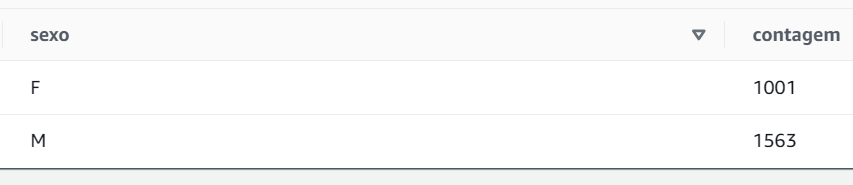

#### Vemos que temos mais de 500 observações a mais na base para homens se comparado ao número de observações para mulheres.

### Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?

### QUERY:

SELECT sexo, MIN(idade) AS idade_min, AVG(idade) AS media_idade, MAX(idade) AS idade_max

FROM credito

GROUP BY sexo;

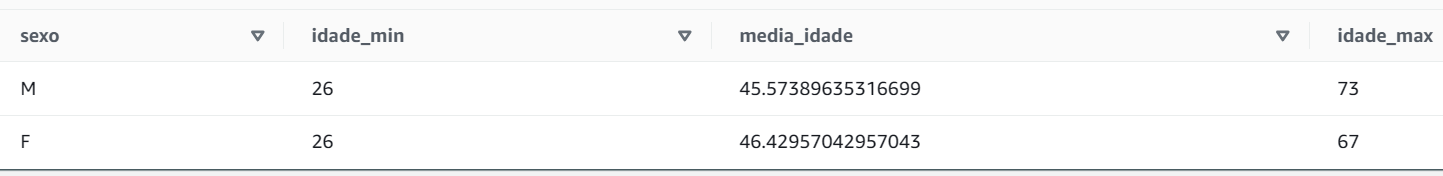

#### Vemos que nesta base as idades estão muito equilibradas sem nuances marcantes entre os sexos. Do ponto de vista de alguma ação de marketing podemos fazer três ações. Uma para cada "faixa" da tabela acima: Idade minima, média de idade e idade máxima.

### Qual a maior e menor transação dos clientes?

### QUERY:

SELECT MIN(valor_transacoes_12m) AS vlr_min_trs, MAX(valor_transacoes_12m) AS vlr_max_trs

FROM credito;

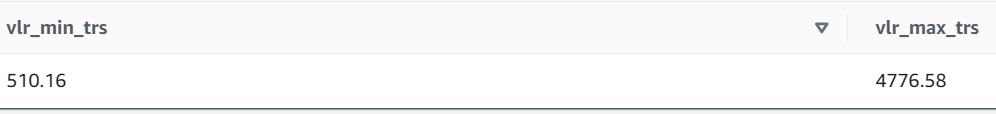

#### O valor de transação diz respeito ao valor de uma compra. Vemos que a menor transação gerou 510,16 reais enquanto o máximo foi de 4.776,58 reais.

### Quais as características dos clientes que possuem os maiores creditos?

### QUERY:

SELECT MAX(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo

FROM credito 

WHERE escolaridade != 'na' and tipo_cartao != 'na' 

GROUP BY escolaridade, tipo_cartao, sexo 

ORDER BY limite_credito ASC;

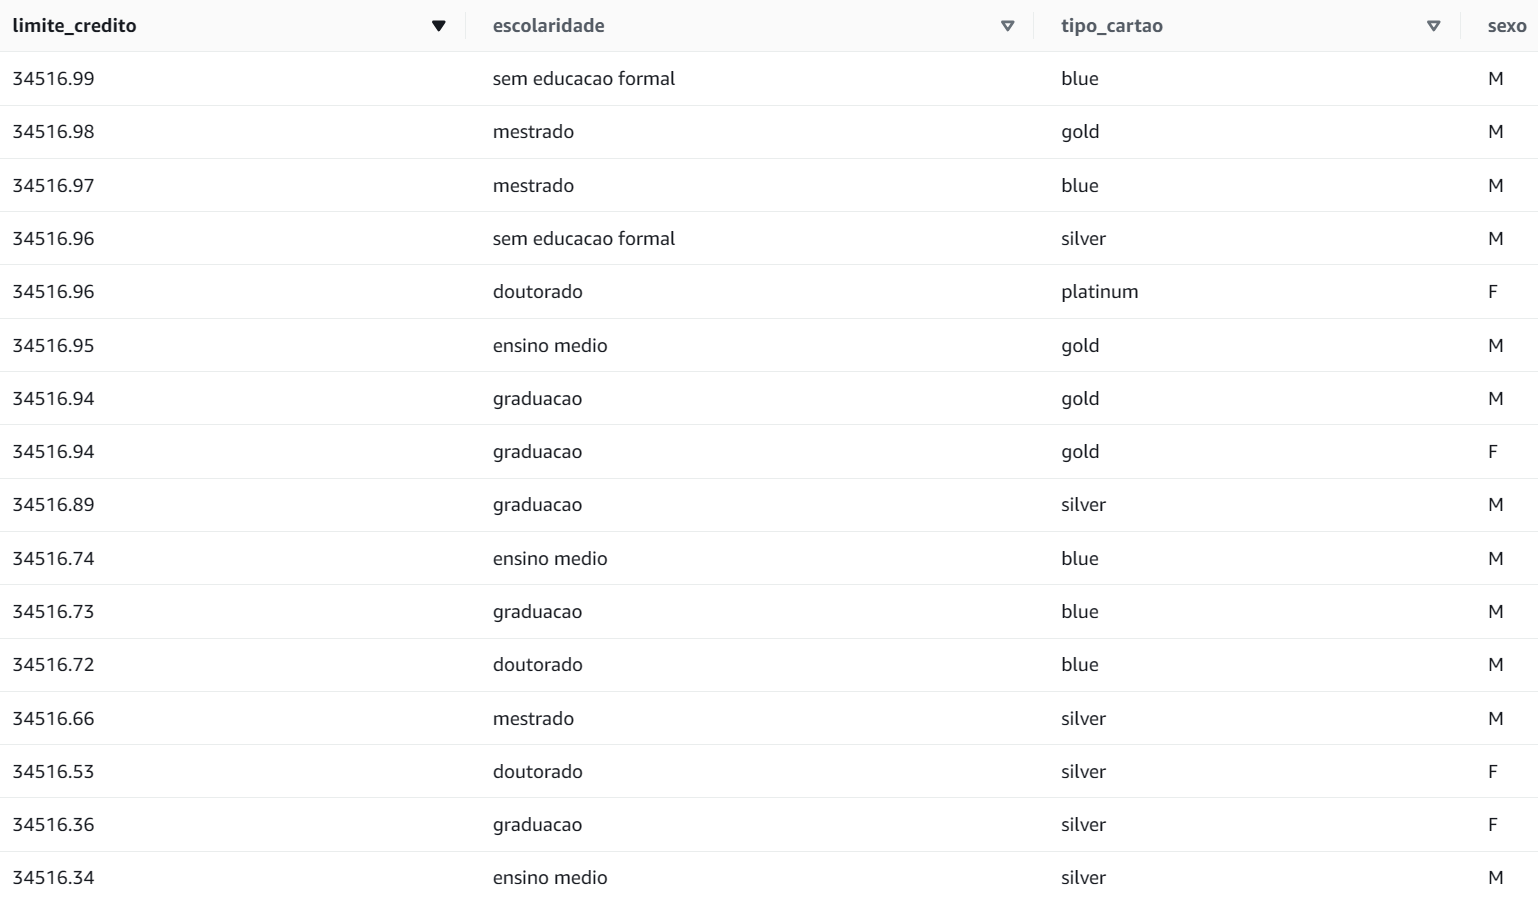

#### O resultado da QUERY acima nos mostra que o nível de escolaridade não influencia diretamente no crédito que o cliente possui bem também como no cartão que ele tem.

### Quais as características dos clientes que possuem os menores creditos?

### QUERY:

SELECT MIN(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo

FROM credito 

WHERE escolaridade != 'na' and tipo_cartao != 'na' 

GROUP BY escolaridade, tipo_cartao, sexo 

ORDER BY limite_credito ASC;

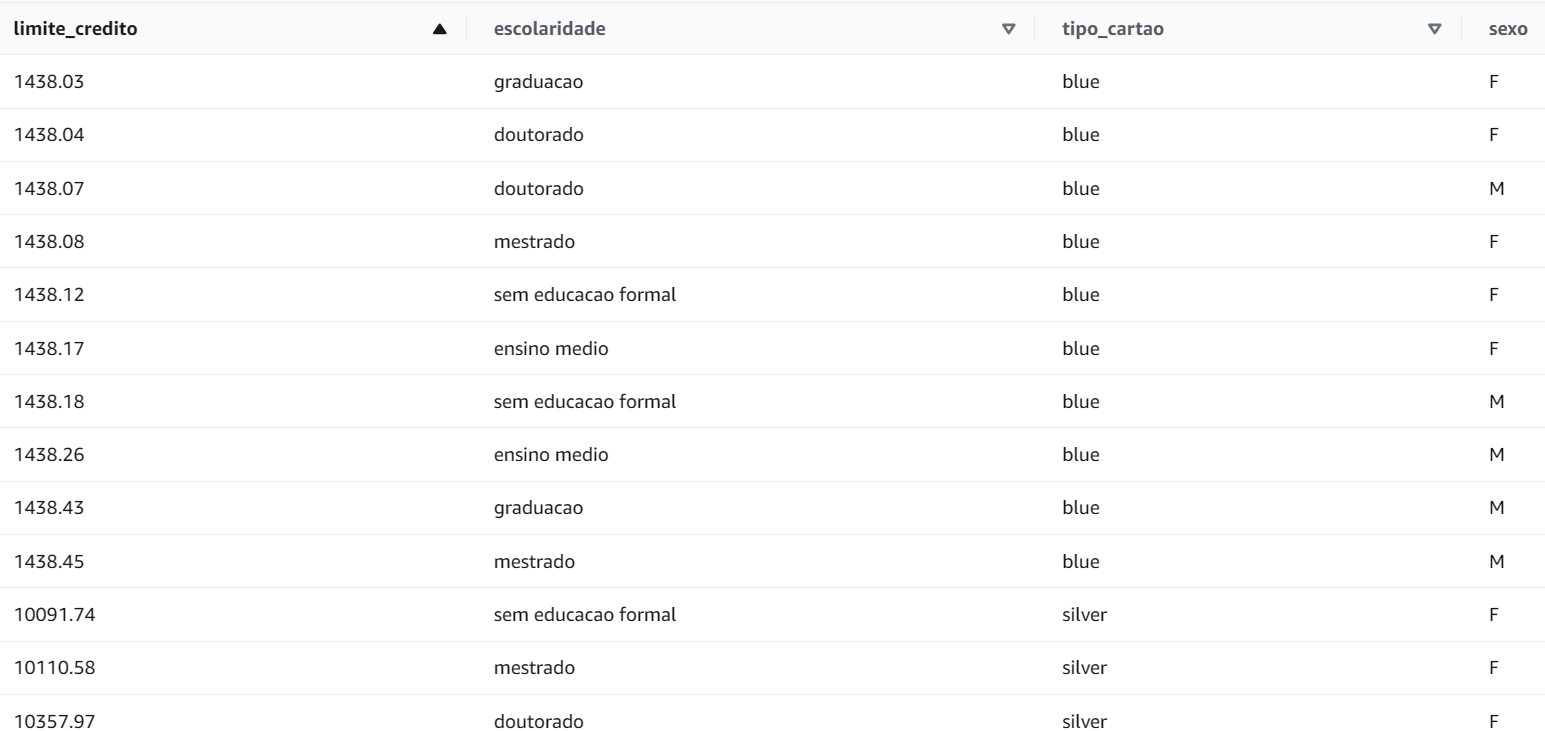

#### Já a QUERY acima nos mostra que existe uma certa correlação entre o limite de crédito ( que na tabela são os menores da base ) e o tipo de cartão de credito que o cliente possui.

### Será que as mulheres gastam mais?

### QUERY:

SELECT sexo,

	MAX(valor_transacoes_12m) AS maior_valor_gasto,
 
	avg(valor_transacoes_12m) AS media_valor_gasto,
 
	min(valor_transacoes_12m) AS min_valor_gasto
 
FROM credito

GROUP BY sexo;

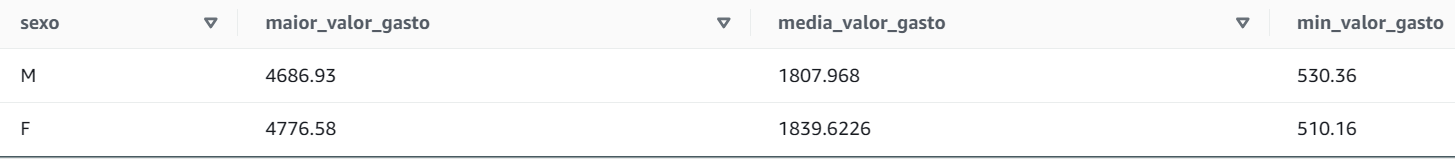

#### A QUERY acima nos mostra que não há diferença marcante entre os gastos dos homens e das mulheres. O que nos acusa de que não existe distinção de valores gastos entre os sexos.

### A idade influencia no salário do cliente?

### QUERY:

SELECT idade,

	AVG(limite_credito) AS sal_med
 
FROM credito

GROUP BY idade

ORDER BY idade ASC;

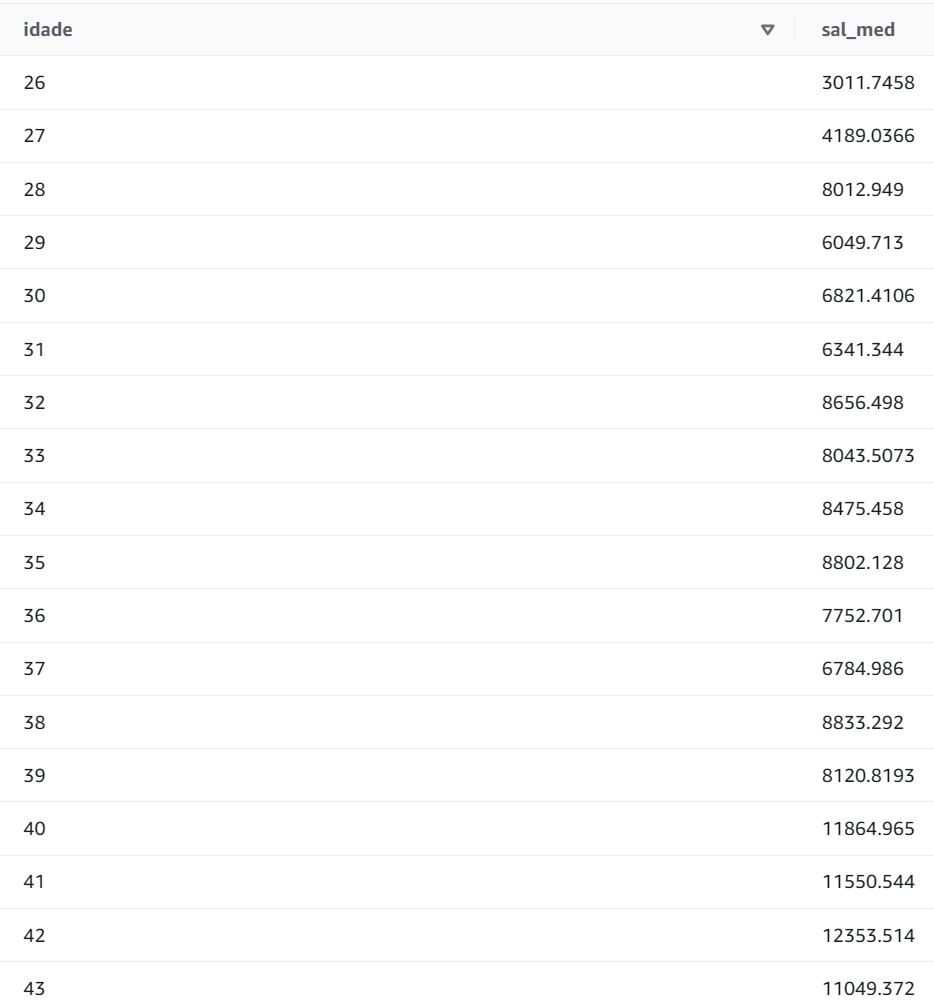

#### É possível ver também que a idade do cliente não impacta diretamente no salário do cliente.

### O salário impacta no limite?

### QUERY:

SELECT salario_anual,

    AVG(qtd_produtos) as qts_produtos,
    
	AVG(valor_transacoes_12m) as media_valor_transacoes,
 
	AVG(limite_credito) as media_limite
 
FROM credito

WHERE salario_anual != 'na'

GROUP BY salario_anual

ORDER BY AVG(valor_transacoes_12m) DESC

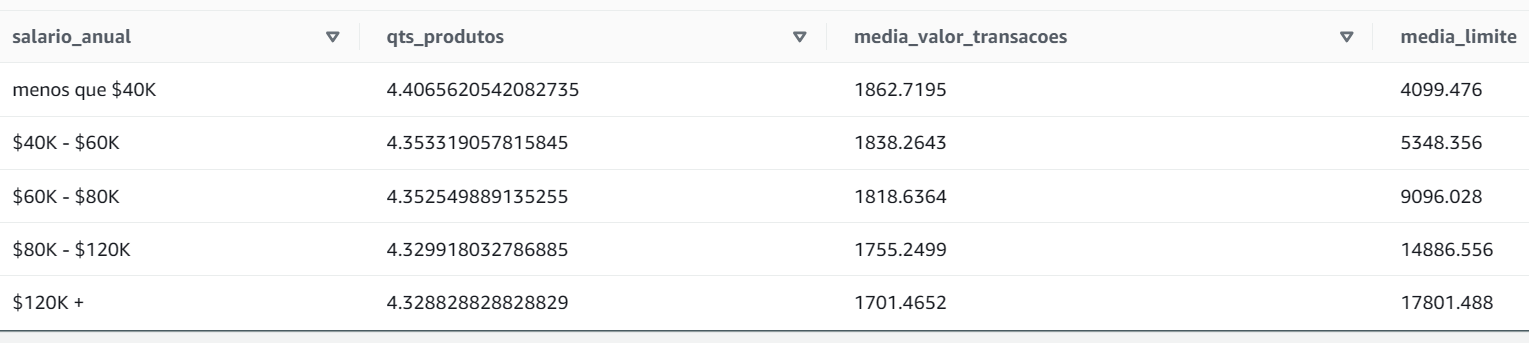

#### Aqui vemos uma correlação clara de que quanto maior o salário anual do cliente, maior o crédito liberado.

---

## Conclusão

##### Essas foram algumas análises extraídas do dataset de crédito:

- a maior parte dos clientes possui renda de até 40k
- a maior parte dos clientes é do sexo masculino
- a escolaridade não parece influenciar no limite nem no tipo do cartão
- os clientes com maiores limites são em sua maioria homens
- os clientes com menores limites são em sua maioria mulheres
- dentre os menores limites não há presença de cartão platinum
- a faixa salarial impacta diretamente no limite de crédito
- não existem clientes com salário anual acima de 60k do sexo feminino
- a idade não influencia no salário dos clienteseminino

##### Uma exploração maior dos dados pode explicar porque as mulheres tem menor crédito. Isso também pode ser um problema cultural que pode ser repensado!